In [1]:
import pandas as pd
import pyarrow.parquet as pq

## Acá tendría que poner la parte de la importación de los archivos, la descompresión y la transformación a parquet

## Limpieza de steam_games

Primero, hay que convertir el archivo steam_games_compr.parquet a un dataframe

In [2]:
df_steam_games = pq.read_table('Datos/steam_games_compr.parquet').to_pandas()

In [3]:
df_steam_games.head() # Con el head ya podemos ver que hay muchos nulos en el db.

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,None,NaN,None
1,None,None,None,None,None,None,None,None,None,None,None,NaN,None
2,None,None,None,None,None,None,None,None,None,None,None,NaN,None
3,None,None,None,None,None,None,None,None,None,None,None,NaN,None
4,None,None,None,None,None,None,None,None,None,None,None,NaN,None


In [3]:
df_steam_games.tail()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
120440,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",http://steamcommunity.com/app/773640/reviews/?...,"['Single-player', 'Steam Achievements']",1.99,False,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",http://steamcommunity.com/app/733530/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,733530.0,Sacada
120442,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",http://steamcommunity.com/app/658870/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,658870.0,"xropi,stev3ns"
120444,None,None,Maze Run VR,None,http://store.steampowered.com/app/681550/Maze_...,None,"['Early Access', 'Adventure', 'Indie', 'Action...",http://steamcommunity.com/app/681550/reviews/?...,"['Single-player', 'Stats', 'Steam Leaderboards...",4.99,True,681550.0,None


Voy a empezar por eliminar todas las filas del df que tengan nulos en todas las columnas

In [4]:
df_steam_games = df_steam_games.dropna(how='all')

In [4]:
df_steam_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro
88311,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL
88312,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com
88313,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,None


Ahora la limpieza de la columna 'price'

In [5]:
df_steam_games[df_steam_games['price'].isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88319,RewindApp,"['Casual', 'Indie', 'Racing', 'Simulation']",Race,Race,http://store.steampowered.com/app/768800/Race/,2018-01-04,"['Indie', 'Casual', 'Simulation', 'Racing']",http://steamcommunity.com/app/768800/reviews/?...,"['Single-player', 'Multi-player', 'Partial Con...",None,False,768800.0,RewindApp
88320,Qucheza,"['Action', 'Indie', 'Simulation', 'Early Access']",Uncanny Islands,Uncanny Islands,http://store.steampowered.com/app/768570/Uncan...,Soon..,"['Early Access', 'Action', 'Indie', 'Simulatio...",http://steamcommunity.com/app/768570/reviews/?...,['Single-player'],None,True,768570.0,Qucheza
88341,BlueLine Games,"['Casual', 'Indie', 'Strategy']",Lost Cities,Lost Cities,http://store.steampowered.com/app/520680/Lost_...,2018-01-01,"['Casual', 'Indie', 'Strategy', 'Card Game', '...",http://steamcommunity.com/app/520680/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",None,False,520680.0,BlueLine Games
88342,Games by Brundle,['Action'],Twisted Enhanced Edition,Twisted Enhanced Edition,http://store.steampowered.com/app/690410/Twist...,2018-01-01,"['Action', 'Platformer', 'Side Scroller']",http://steamcommunity.com/app/690410/reviews/?...,"['Single-player', 'Full controller support']",None,False,690410.0,Games by Brundle
88344,ProjectorGames,"['Action', 'Casual', 'Indie', 'Massively Multi...",Tactics Forever,Tactics Forever,http://store.steampowered.com/app/413120/Tacti...,2018-01-01,"['Casual', 'Action', 'Massively Multiplayer', ...",http://steamcommunity.com/app/413120/reviews/?...,"['Online Multi-Player', 'MMO', 'Cross-Platform...",None,False,413120.0,ProjectorGames
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120409,Picorinne Soft,"['Action', 'Indie']",Infinos Gaiden,Infinos Gaiden,http://store.steampowered.com/app/771070/Infin...,2018-01-19,"['Action', 'Indie', ""Shoot 'Em Up""]",http://steamcommunity.com/app/771070/reviews/?...,"['Single-player', 'Partial Controller Support']",None,False,771070.0,Picorinne Soft
120421,None,['Sports'],International Online Soccer,International Online Soccer,http://store.steampowered.com/app/90007/Intern...,2002-01-01,"['Sports', 'Mod']",http://steamcommunity.com/app/90007/reviews/?b...,"['Multi-player', 'Mods (require HL2)']",None,False,90007.0,I.O.S. Team
120433,VersoVR,"['Casual', 'Indie', 'Simulation', 'Sports', 'E...",Cricket Club,Cricket Club,http://store.steampowered.com/app/772180/Crick...,January 2018,"['Early Access', 'Indie', 'Casual', 'Simulatio...",http://steamcommunity.com/app/772180/reviews/?...,['Single-player'],None,True,772180.0,VersoVR
120435,Retro Army Limited,"['Action', 'Adventure', 'Indie']",The spy who shot me™,The spy who shot me™,http://store.steampowered.com/app/771810/The_s...,2018-10-01,"['Action', 'Adventure', 'Indie']",http://steamcommunity.com/app/771810/reviews/?...,"['Single-player', 'Captions available']",None,False,771810.0,Retro Army Limited


Hay demasiados como para llenarlos manualmente, y no tengo una manera eficiente de buscar el precio de 1377 juegos, así que decidí borrar los nulos de la columna 'price'.

In [5]:
df_steam_games.dropna(subset=['price'], inplace=True)

In [6]:
df_steam_games['price'][df_steam_games['price']==0.00].count()

0

Como no hay valores con precio = 0.00, necesito otra manera de distinguir los juegos gratis. Para esto creo una variable llamada juegos_gratis para saber cuántos juegos con la palabra 'free' hay.

In [7]:
juegos_gratis = df_steam_games[df_steam_games['price'].str.contains(r'\bfree\b', case=False, regex=True)]

Hay 1900 juegos con la palabra 'free'. Según los casos que pude ver, son los juegos gratis.

In [8]:
len(juegos_gratis)

1900

Voy a sacar todos los valores no numericos de la columna. Los valores que tenían la palabra 'free' ahora son Nan.

In [9]:
df_steam_games['price'] = df_steam_games['price'].str.extract(r'(\d+.\d+)')

In [10]:
df_steam_games[df_steam_games['price'].isna()] # Las filas con Nan ahora son los juegos gratis

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88311,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",NaN,False,643980.0,Secret Level SRL
88312,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",NaN,False,670290.0,Poolians.com
88321,None,None,Icarus Six Sixty Six,None,http://store.steampowered.com/app/724910/Icaru...,None,['Casual'],http://steamcommunity.com/app/724910/reviews/?...,"['Single-player', 'HTC Vive', 'Tracked Motion ...",NaN,False,724910.0,None
88370,Unknown Worlds Entertainment,"['Casual', 'Indie']",Zen of Sudoku,Zen of Sudoku,http://store.steampowered.com/app/4900/Zen_of_...,2006-12-14,"['Casual', 'Indie', 'Puzzle']",http://steamcommunity.com/app/4900/reviews/?br...,['Single-player'],NaN,False,4900.0,Unknown Worlds Entertainment
88501,Tripwire Interactive,['Action'],Mare Nostrum,Mare Nostrum,http://store.steampowered.com/app/1230/Mare_No...,2008-10-17,"['Action', 'World War II', 'FPS', 'Mod', 'Mult...",http://steamcommunity.com/app/1230/reviews/?br...,"['Multi-player', 'Mods', 'Steam Achievements']",NaN,False,1230.0,Sandstorm Productions
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120317,Engin Mercan,"['Action', 'Casual', 'Free to Play', 'Indie']",Bloodworks,Bloodworks,http://store.steampowered.com/app/717990/Blood...,2018-01-01,"['Indie', 'Casual', 'Free to Play', 'Action']",http://steamcommunity.com/app/717990/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",NaN,False,717990.0,Engin Mercan
120387,None,None,SpaceWalker,None,http://store.steampowered.com/app/705860/Space...,None,"['Early Access', 'Casual']",http://steamcommunity.com/app/705860/reviews/?...,"['Single-player', 'HTC Vive', 'Oculus Rift', '...",NaN,True,705860.0,None
120410,杭州分浪网络科技有限公司,"['Action', 'Free to Play', 'Massively Multipla...",忍者村大战2,忍者村大战2,http://store.steampowered.com/app/754350/2/,2018-01-03,"['Free to Play', 'Strategy', 'Action', 'Massiv...",http://steamcommunity.com/app/754350/reviews/?...,"['Online Multi-Player', 'In-App Purchases']",NaN,False,754350.0,杭州分浪网络科技有限公司
120411,KUMA GAMES,['Simulation'],High School Simulator,High School Simulator,http://store.steampowered.com/app/754620/High_...,2018-01-03,"['Simulation', 'Sexual Content', 'Gore', 'Viol...",http://steamcommunity.com/app/754620/reviews/?...,"['Single-player', 'Partial Controller Support']",NaN,False,754620.0,KUMA GAMES


Por ahora la columna 'price' está bien. Ahora voy a pasar al tratamiento de la columna 'genres'.

In [9]:
df_steam_games['genres'].value_counts()

genres
['Action']                                                                                                                1815
['Action', 'Indie']                                                                                                       1574
['Simulation']                                                                                                            1373
['Casual', 'Simulation']                                                                                                  1357
['Strategy']                                                                                                              1021
                                                                                                                          ... 
['Adventure', 'Casual', 'Indie', 'Racing', 'RPG', 'Simulation', 'Sports', 'Strategy']                                        1
['Animation &amp; Modeling', 'Audio Production', 'Design &amp; Illustration', 'Software Training', 'Vide

'genres' tiene valores de tipo listas. Voy a separar esas listas para tener los valores particulares de géneros. Para esto, les saco los corchetes y las comas, y va a quedar una fila por valor.  

In [11]:
# Saco los corchetes, lo que convierte las listas en la columna 'genres' en una cadena separada por comas
df_steam_games['genres'] = df_steam_games['genres'].apply(lambda x: str(x).replace('[', '').replace(']', ''))


# Separa la cadena por comas y agrega una fila por cada valor individual
df_steam_games['genres'] = df_steam_games['genres'].str.split(', ')
df_steam_games = df_steam_games.explode('genres')
df_steam_games['genres'] = df_steam_games['genres'].apply(lambda x: str(x).replace("'", ""))

In [32]:
df_steam_games['genres'].value_counts()

genres
Indie                        15139
Action                       10720
Casual                        8071
Adventure                     7822
Strategy                      6709
Simulation                    6517
RPG                           5132
None                          3136
Free to Play                  1887
Early Access                  1387
Sports                        1209
Racing                        1051
Massively Multiplayer         1004
Design &amp; Illustration      451
Utilities                      323
Web Publishing                 261
Animation &amp; Modeling       172
Education                      122
Video Production               106
Software Training              102
Audio Production                86
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

Veo que hay un valor de 'genres' que es "Free to play". Consideré agregar los juegos que corresponden a este género a la categoría 'Free', pero decido no hacerlo porque me parece más acertado guiarme por el criterio de la columna 'price'.

Me parece que un worcloud puede dar un análisis inicial acertivo para la columna 'genres'.

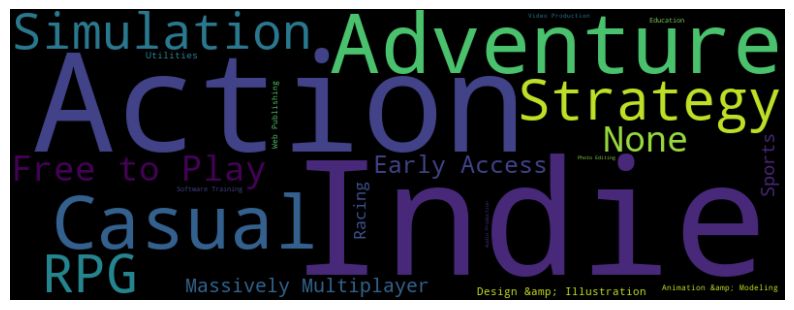

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Cuenta la frecuencia de cada género
frecuencia_de_genero = df_steam_games['genres'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_de_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Voy a hacer lo mismo, pero para la columna 'tags'.

In [12]:
# Saco los corchetes y así convierto las listas en la columna 'genres' en una cadena separada por comas
df_steam_games['tags'] = df_steam_games['tags'].apply(lambda x: str(x).replace('[', '').replace(']', ''))


# Separo la cadena por comas y agrega una fila por cada valor individual
df_steam_games['tags'] = df_steam_games['tags'].str.split(', ')
df_steam_games = df_steam_games.explode('tags')
df_steam_games['tags'] = df_steam_games['tags'].apply(lambda x: str(x).replace("'", ""))

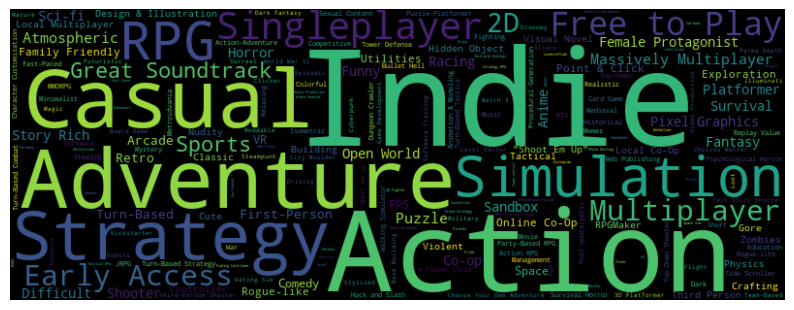

In [16]:
# Cuenta la frecuencia de cada tag
frecuencia_por_tag = df_steam_games['tags'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_por_tag)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Finalmente, voy a hacer el mismo proceso de las columnas anteriores pero para la columna 'specs'.

In [13]:
# Saco los corchetes y así convierto las listas en la columna 'specs' en una cadena separada por comas
df_steam_games['specs'] = df_steam_games['specs'].apply(lambda x: str(x).replace('[', '').replace(']', ''))

# Separo la cadena por comas y agrega una fila por cada valor individual
df_steam_games['specs'] = df_steam_games['specs'].str.split(', ')
df_steam_games = df_steam_games.explode('specs')
df_steam_games['specs'] = df_steam_games['specs'].apply(lambda x: str(x).replace("'", ""))

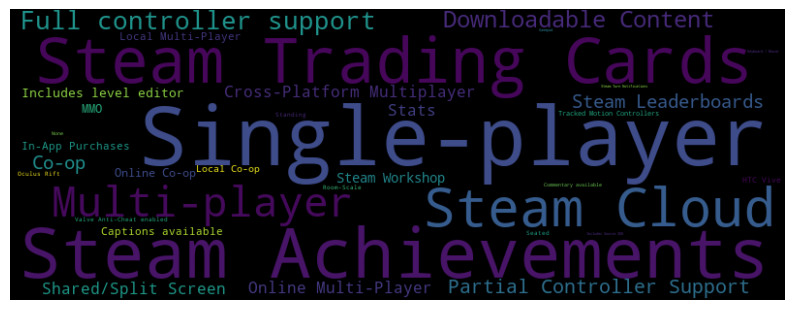

In [18]:
# Cuenta la frecuencia de cada specs
frecuencia_por_specs = df_steam_games['specs'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_por_specs)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Con estos wordcloud tenemos un EDA aproximado pero muy útil de las columnas 'genres', 'tags' y 'specs'. 

EDA de la columna 'release_date'.

In [14]:
df_steam_games['release_date'].isnull().sum()

80621

In [29]:
df_steam_games['release_date'].value_counts()

release_date
2016-06-16     6481
2017-11-17     6007
2017-12-15     5760
2017-04-26     5708
2016-11-18     5696
2016-09-09     5465
2017-09-14     5389
2016-09-29     5383
2017-08-10     5352
2016-04-28     5222
2016-12-16     5194
2017-09-22     5161
2017-05-26     5083
2017-06-20     4983
2017-07-26     4884
2017-02-10     4737
2017-03-10     4687
2017-12-14     4669
2017-04-07     4643
2017-08-31     4586
2017-04-25     4585
2017-12-12     4581
2015-09-15     4536
2016-10-14     4522
2016-09-22     4488
2017-08-22     4349
2015-04-02     4302
2017-06-01     4271
2017-02-21     4241
2017-10-20     4191
2017-10-03     4177
2017-08-29     4169
2017-08-01     4153
2017-09-15     3988
2017-11-02     3980
2016-10-04     3951
2015-07-07     3883
2017-01-13     3852
2017-01-10     3824
2017-12-01     3820
2017-04-03     3783
2017-09-26     3781
2016-04-22     3740
2016-05-06     3716
2016-11-15     3688
2017-02-14     3652
2015-02-19     3645
2017-08-08     3644
2016-10-25     3642
2016-07

Ahora quiero hacer una columna de años a partir de la columna release_date, ya que es la única información que quiero de esa columna y la vuelve más fácil de leer. Para esto uso un código que extrae los valores que son 4 números consecutivos, ya que ese es el año en todos los casos. 

In [15]:
df_steam_games['anio'] = df_steam_games['release_date'].str.extract(r'(\d{4})')

In [20]:
df_steam_games['anio'].value_counts()

anio
2017    615526
2016    508032
2015    354576
2014    204761
2013     99685
2012     55918
2011     32934
2010     17619
2009     10961
2008      5682
2007      5597
2006      4573
2018      4367
2003      3177
2005      3149
2001      2231
2004      1780
1999      1352
1997      1309
2002      1101
1998       955
1996       659
2000       637
1994       586
1995       519
1993       382
1992       257
1988       167
1991       140
1984       132
1983       111
1986        90
1989        90
1990        81
2019        72
1987        40
2021        18
1985        10
1982         7
1981         4
1970         3
1975         1
1980         1
Name: count, dtype: int64

In [21]:
df_steam_games['anio'].isnull().value_counts()

anio
False    1939292
True       80758
Name: count, dtype: int64

Ya tengo la información que necesitaba de la columna 'release_date' en otra columna nueva, por lo que la voy a dropear.

In [16]:
fecha = df_steam_games['release_date']
df_steam_games.drop('release_date', axis=1, inplace=True)

<Axes: xlabel='anio'>

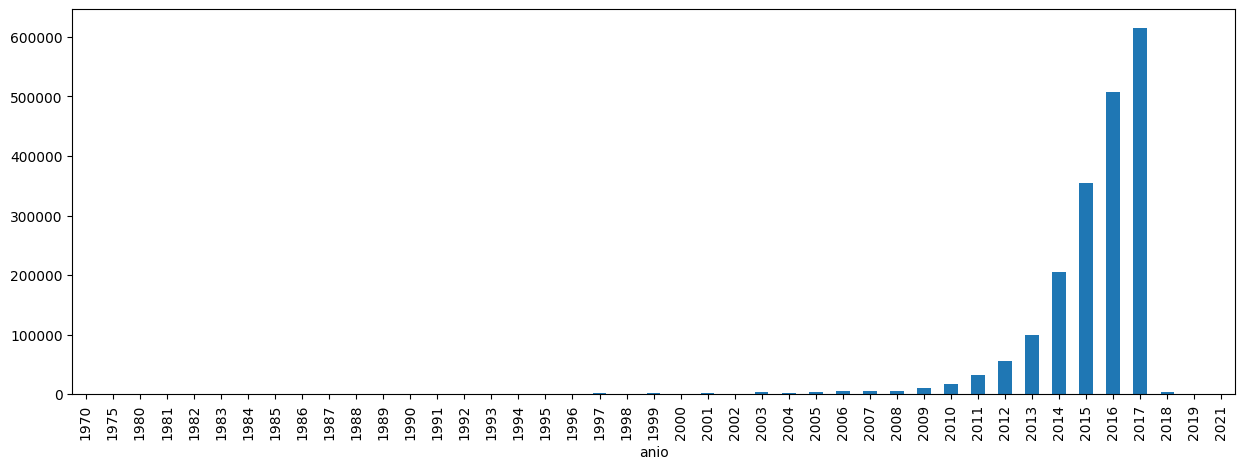

In [17]:
df_steam_games['anio'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))

In [34]:
df_steam_games.head(5)

,publisher,genres,app_name,title,url,tags,reviews_url,specs,price,early_access,id,developer,anio
88310,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Strategy,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018
88310,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Action,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018
88310,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Indie,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018
88310,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Casual,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018
88310,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Simulation,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018


In [18]:
df_steam_games.reset_index(drop=True, inplace=True)
df_steam_games.head(5)

,publisher,genres,app_name,title,url,tags,reviews_url,specs,price,early_access,id,developer,anio
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Strategy,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018
1,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Action,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018
2,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Indie,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018
3,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Casual,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018
4,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Simulation,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018


Tengo valores nulos todavía en la columna 'anio', pero por ahora los voy a dejar. Ahora quiero pasar al eda y tratamiento de las columnas 'title' y 'app_name'. Lo hago en conjunto porque a primera vista parecen muy similares.

In [19]:
df_steam_games['app_name'].isnull().sum()

1

In [20]:
df_steam_games['title'].isnull().sum()

80045

In [27]:
df_steam_games[df_steam_games['app_name'].isnull()]

,publisher,genres,app_name,title,url,tags,reviews_url,specs,price,early_access,id,developer,anio
3751,None,None,None,None,http://store.steampowered.com/,None,None,None,19.99,False,NaN,None,NaN


In [21]:
df_steam_games = df_steam_games.dropna(subset=['app_name'])

Voy a dropear la columna 'title' porque tiene muchos nulos y 'app_name' ya no, por lo que no me va a servir la primera para completar la segunda en caso de que tuviera nulos. 

In [22]:
title = df_steam_games['title']


In [23]:
df_steam_games.drop('title', axis=1, inplace=True)

También voy a dropear las columnas 'url' y 'reviews_url'

In [24]:
url = df_steam_games['url']
reviews_url = df_steam_games['reviews_url']

In [25]:
df_steam_games.drop(columns=['url', 'reviews_url'], axis=1, inplace=True)

In [43]:
df_steam_games.head(3)

,publisher,genres,app_name,tags,specs,price,early_access,id,developer,anio
0,Kotoshiro,Action,Lost Summoner Kitty,Strategy,Single-player,4.99,False,761140.0,Kotoshiro,2018
1,Kotoshiro,Action,Lost Summoner Kitty,Action,Single-player,4.99,False,761140.0,Kotoshiro,2018
2,Kotoshiro,Action,Lost Summoner Kitty,Indie,Single-player,4.99,False,761140.0,Kotoshiro,2018


Quiero hacer el EDA y tratamiento de las columnas 'developer' y 'Publisher' también en conjunto, ya que parecen parecidas. Quiero ver si son redundantes (y eliminar la peor en caso de que lo sean), o si puedo llenar los vacíos de una con la otra. 

In [26]:
df_steam_games['developer'].isna().sum()

90166

In [38]:
df_steam_games['publisher'].isna().sum()

332028

Quiero rellenar los valores de 'developer' que sean nulos con valores de 'publisher' que no lo sean. 

In [27]:
lista1 = pd.Series(df_steam_games['publisher'])
lista2 = pd.Series(df_steam_games['developer'])

In [28]:
df_steam_games['developer'].fillna(df_steam_games['publisher'], inplace=True)

Conseguí rellenar aproximadamente 4000 valores. La columna 'publisher' no me sirve. La voy a dropear a continuacion.

In [29]:
df_steam_games['developer'].isna().sum()

86362

In [30]:
publisher = df_steam_games['publisher']

In [31]:
df_steam_games.drop('publisher',axis=1,inplace=True)

In [55]:
df_steam_games.head(3)

,genres,app_name,tags,specs,price,early_access,id,developer,anio
0,Action,Lost Summoner Kitty,Strategy,Single-player,4.99,False,761140.0,Kotoshiro,2018
1,Action,Lost Summoner Kitty,Action,Single-player,4.99,False,761140.0,Kotoshiro,2018
2,Action,Lost Summoner Kitty,Indie,Single-player,4.99,False,761140.0,Kotoshiro,2018


Voy a eliminar 'early_access' porque no me sirve para nada.

In [32]:
early_access = df_steam_games['early_access']

In [33]:
df_steam_games.drop('early_access', axis=1, inplace=True)

Voy a convertir el tipo de dato de 'anio' e 'id' a integer. Para eso tengo que pasar los nulos a 0.

In [34]:
df_steam_games['anio'][df_steam_games['anio'].isnull()] = 0

C:\Users\diego\AppData\Local\Temp\ipykernel_11480\2010052147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam_games['anio'][df_steam_games['anio'].isnull()] = 0


In [35]:
df_steam_games['anio'] = df_steam_games['anio'].astype(int)

In [36]:
df_steam_games['anio'][df_steam_games['anio'].isnull()]

Series([], Name: anio, dtype: int32)

Ahora viy a pasar todos los caracteres a minúsculas y a realizar una limpieza general de símbolos que pueden resultar problemáticos para el análisis y que no tienen ninguna utilidad en general.

In [37]:
df_steam_games = df_steam_games.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)

df_steam_games = df_steam_games.apply(lambda x: x.str.replace('-', ' ') if x.dtype == "object" else x)

df_steam_games = df_steam_games.apply(lambda x: x.str.replace('!', '') if x.dtype == "object" else x)

df_steam_games = df_steam_games.apply(lambda x: x.str.replace('¡', '') if x.dtype == "object" else x)

df_steam_games = df_steam_games.apply(lambda x: x.str.replace('?', '') if x.dtype == "object" else x)

df_steam_games = df_steam_games.apply(lambda x: x.str.replace('¿', '') if x.dtype == "object" else x)

df_steam_games = df_steam_games.apply(lambda x: x.str.replace('"', '') if x.dtype == "object" else x)

df_steam_games = df_steam_games.apply(lambda x: x.str.replace("'", '') if x.dtype == "object" else x)

df_steam_games = df_steam_games.apply(lambda x: x.str.replace(",", '') if x.dtype == "object" else x)

df_steam_games = df_steam_games.apply(lambda x: x.str.replace("&", '') if x.dtype == "object" else x)

df_steam_games = df_steam_games.apply(lambda x: x.str.replace("''", '') if x.dtype == "object" else x)

df_steam_games = df_steam_games.apply(lambda x: x.str.replace("_", '') if x.dtype == "object" else x)

df_steam_games.head(2)

,genres,app_name,tags,specs,price,id,developer,anio
0,action,lost summoner kitty,strategy,single player,4.99,761140.0,kotoshiro,2018
1,action,lost summoner kitty,action,single player,4.99,761140.0,kotoshiro,2018


A continuación voy a quitar el '.0' de la columna id para hacerlo entero.

In [38]:
df_steam_games['id'] = df_steam_games['id'].apply(lambda x: str(x).replace('.0', ''))

In [39]:
df_steam_games['id'] = pd.to_numeric(df_steam_games['id'], errors='coerce').fillna(0).astype(int)

In [42]:
df_steam_games.head(10)

,genres,app_name,tags,specs,price,id,developer,anio
0,action,lost summoner kitty,strategy,single player,4.99,761140,kotoshiro,2018
1,action,lost summoner kitty,action,single player,4.99,761140,kotoshiro,2018
2,action,lost summoner kitty,indie,single player,4.99,761140,kotoshiro,2018
3,action,lost summoner kitty,casual,single player,4.99,761140,kotoshiro,2018
4,action,lost summoner kitty,simulation,single player,4.99,761140,kotoshiro,2018
5,casual,lost summoner kitty,strategy,single player,4.99,761140,kotoshiro,2018
6,casual,lost summoner kitty,action,single player,4.99,761140,kotoshiro,2018
7,casual,lost summoner kitty,indie,single player,4.99,761140,kotoshiro,2018
8,casual,lost summoner kitty,casual,single player,4.99,761140,kotoshiro,2018
9,casual,lost summoner kitty,simulation,single player,4.99,761140,kotoshiro,2018


In [45]:
df_steam_games.dropna(subset=['id'], inplace=True)
df_steam_games.dropna(subset=['developer'], inplace=True)

Reemplazando los valores nulos de genres con los de tags si es que tiene.

In [57]:
df_steam_games['price'] = df_steam_games['price'].astype(float)

In [58]:
df_steam_games.describe(include='all') 

,genres,app_name,tags,specs,price,id,developer,anio
count,2020049,2020049,2020049,2020049,1.822239e+06,2.020049e+06,2020049,2.020049e+06
unique,23,30708,340,40,NaN,NaN,10570,NaN
top,indie,arm planetary prospectors asteroid resource mi...,indie,single player,NaN,NaN,none,NaN
freq,442355,1980,215957,376324,NaN,NaN,86362,NaN
mean,NaN,NaN,NaN,NaN,1.149758e+01,4.321980e+05,NaN,1.934687e+03
std,NaN,NaN,NaN,NaN,1.402514e+01,1.671836e+05,NaN,3.948088e+02
min,NaN,NaN,NaN,NaN,4.900000e-01,0.000000e+00,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,3.990000e+00,3.133810e+05,NaN,2.014000e+03
50%,NaN,NaN,NaN,NaN,8.990000e+00,4.233670e+05,NaN,2.016000e+03
75%,NaN,NaN,NaN,NaN,1.499000e+01,5.599600e+05,NaN,2.017000e+03


Tengo que cambiar los valores que son nulos de 'price' a 0.0

In [61]:
df_steam_games['price'].fillna(0.0, inplace=True)

Guardo una copia del archivo limpio.

In [62]:
import pyarrow.parquet as pq
df_steam_games.to_parquet('Datos/df_steam_games_limpio_final.parquet')